In [52]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from delete_stopwords import delete_stopwords
from dataprep import load_datasets

In [53]:
train_df,test_df,val_df = load_datasets()

df=pd.concat([train_df,val_df])
print(df.head())
print(test_df.head())



                                                text    label
0                      tôi không cảm thấy bị sỉ nhục  sadness
1  tôi có thể đi từ cảm giác vô vọng đến vô cùng ...  sadness
2  tôi đang tranh thủ một phút để đăng bài, tôi c...    anger
3  tôi luôn cảm thấy hoài niệm về lò sưởi tôi sẽ ...     love
4                         tôi đang cảm thấy cáu kỉnh    anger
                                                text    label
0  tôi đang cảm thấy khá chán nản nên hiện tại tô...  sadness
1  tôi đang cập nhật blog của mình vì tôi cảm thấ...  sadness
2  tôi không bao giờ để cô ấy tách khỏi tôi bởi v...  sadness
3  tôi rời đi với bó hoa tulip đỏ và vàng dưới cá...      joy
4        tôi đã cảm thấy hơi vô ích khi làm điều này  sadness


In [54]:
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# df['text'] = df['text'].apply(lambda x: re.sub(r'[^ a-zA-Z0–9]', '', x))
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# test_df['text'] = test_df['text'].apply(lambda x: re.sub(r'[^ a-zA-Z0–9]', '', x))
test_df['text'] = test_df['text'].str.replace(r'\d+', '', regex=True)
test_df['text'] = test_df['text'].str.replace(r'\s+', ' ', regex=True)
test_df['text'] = test_df['text'].str.replace(r'[^\w\s]', '', regex=True)
test_df['text'] = test_df['text'].str.replace(r'http\S+', '', regex=True)


print(df.head())

                                                text    label
0                      tôi không cảm thấy bị sỉ nhục  sadness
1  tôi có thể đi từ cảm giác vô vọng đến vô cùng ...  sadness
2  tôi đang tranh thủ một phút để đăng bài tôi cả...    anger
3  tôi luôn cảm thấy hoài niệm về lò sưởi tôi sẽ ...     love
4                         tôi đang cảm thấy cáu kỉnh    anger


In [55]:
stopwords_file = 'C:/Users/thanh/Documents/NLP20241PRJ-1/src/vietnamese_stopwords.txt'
df = delete_stopwords(df, stopwords_file)  
test_df= delete_stopwords(test_df, stopwords_file)
print(df.head())
print(test_df.head())

                                                text    label
0                                    thấy bị sỉ nhục  sadness
1  thể giác vô vọng vô hy vọng ở cạnh người quan ...  sadness
2       tranh thủ phút để đăng bài thấy thật sai lầm    anger
3            luôn thấy hoài niệm về lò sưởi nó ở nhà     love
4                                      thấy cáu kỉnh    anger
                                                text    label
0               thấy khá chán nản hiện tham vọng lắm  sadness
1                cập nhật blog mình thấy thật tồi tệ  sadness
2  bao để cô ấy tách khỏi bao muốn cô ấy thấy thể...  sadness
3  rời bó hoa tulip đỏ vàng cánh tay thấy lạc qua...      joy
4                             đã thấy hơi vô ích làm  sadness


In [56]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
vectorizer =TfidfVectorizer(max_features= 5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model =LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)
# eval model on val file
y_pred = model.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(classification_report(y_val, y_pred))
# eval model on test file
X_test = vectorizer.transform(test_df['text']).toarray()
y_test = test_df['label']
y_test_pred = model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))


Accuracy: 0.7316666666666667
              precision    recall  f1-score   support

       anger       0.77      0.66      0.71       462
        fear       0.71      0.59      0.65       415
         joy       0.71      0.87      0.78      1176
        love       0.68      0.42      0.52       318
     sadness       0.77      0.79      0.78      1092
    surprise       0.67      0.49      0.57       137

    accuracy                           0.73      3600
   macro avg       0.72      0.64      0.67      3600
weighted avg       0.73      0.73      0.72      3600

Test Accuracy: 0.722
              precision    recall  f1-score   support

       anger       0.73      0.64      0.68       275
        fear       0.72      0.62      0.67       224
         joy       0.73      0.86      0.79       695
        love       0.60      0.35      0.44       159
     sadness       0.74      0.76      0.75       581
    surprise       0.70      0.45      0.55        66

    accuracy               

In [57]:
# Define a mapping dictionary
label_mapping = {'sadness':0, 'joy':1, 'love':2, 'anger':3, 'fear':4,'surprise':5}

# Rename the 'Label' column using the mapping dictionary
df['label'] = df['label'].map(label_mapping)
df.head()

,text,label
0,thấy bị sỉ nhục,0
1,thể giác vô vọng vô hy vọng ở cạnh người quan ...,0
2,tranh thủ phút để đăng bài thấy thật sai lầm,3
3,luôn thấy hoài niệm về lò sưởi nó ở nhà,2
4,thấy cáu kỉnh,3


In [58]:
# splitting the data 
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ", X_test.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)

The shape of X_train is  (14400,)
The shape of X_test is  (3600,)
The shape of y_train is (14400,)
The shape of y_test is (3600,)


In [59]:
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
X = df['text'].values
y = df['label'].values
tokenizer = Tokenizer(num_words=60000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
maxlen = max(len(tokens) for tokens in X_sequences)
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post')
input_size = np.max(X_padded) + 1
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Embedding(input_dim=input_size, output_dim=100, input_shape=(maxlen,))) 
model.add(Bidirectional(LSTM(128))) 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(6, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])


Epoch 1/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.4560 - loss: 1.4275 - val_accuracy: 0.4572 - val_loss: 1.2867
Epoch 2/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 56s 124ms/step - accuracy: 0.7087 - loss: 0.8628 - val_accuracy: 0.6003 - val_loss: 1.2254
Epoch 3/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - accuracy: 0.7501 - loss: 0.7301 - val_accuracy: 0.5061 - val_loss: 2.0496
Epoch 4/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 56s 123ms/step - accuracy: 0.7853 - loss: 0.6260 - val_accuracy: 0.5536 - val_loss: 1.4418
Epoch 5/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 58s 128ms/step - accuracy: 0.8095 - loss: 0.5638 - val_accuracy: 0.6858 - val_loss: 0.8887
Epoch 6/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.8193 - loss: 0.5086 - val_accuracy: 0.7106 - val_loss: 0.9723
Epoch 7/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.8413 - loss: 0.4657 - val_accuracy: 0.3869 - val_loss: 4.1521
Epoch 8/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8510 - loss: 0.435

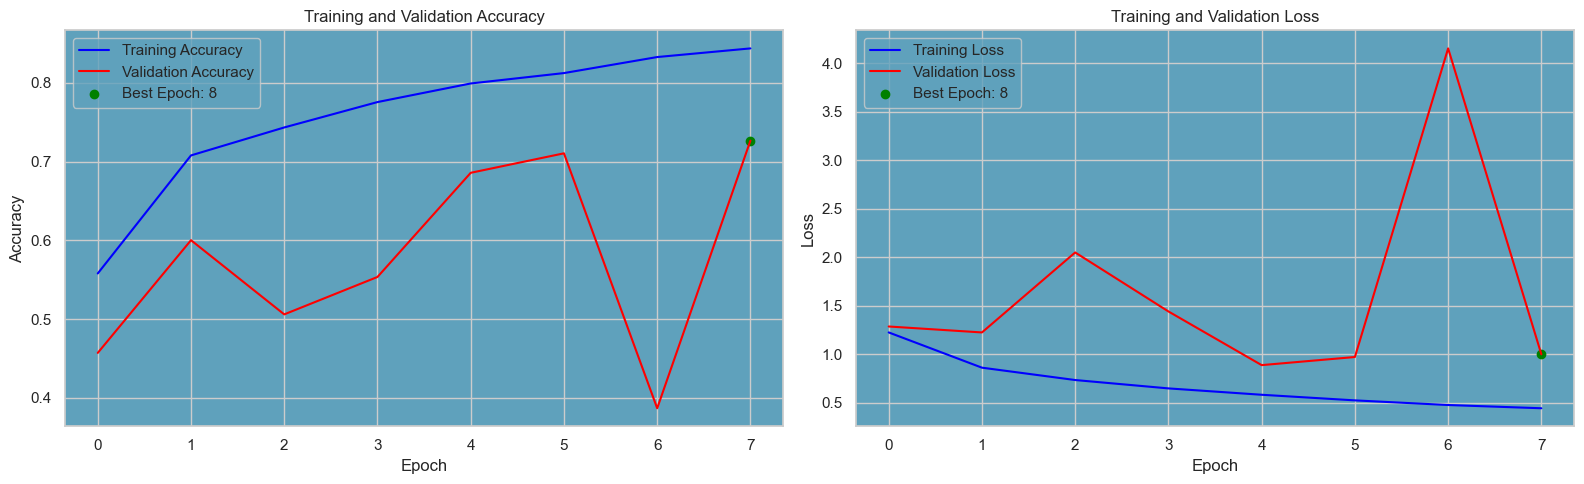

In [60]:
# Set the background color and theme
import seaborn as sns
import matplotlib.pyplot as plt
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()